In [3]:
import pandas as pd

df = pd.read_csv('./data/book_sales.csv',
                index_col='Date',
                parse_dates=['Date'],
                ).drop('Paperback', axis=1)

df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


### Linear Regression with Time Series
- 선형 회귀 알고리즘으로 시계열 모델을 만들것이다.
- target = weight_1 * feature_1 + weight_2 * feature_2 + bias


In [4]:
import numpy as np
df['Time'] = np.arange(len(df.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


C:\Users\user\AppData\Local\Temp\ipykernel_12064\2594472845.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

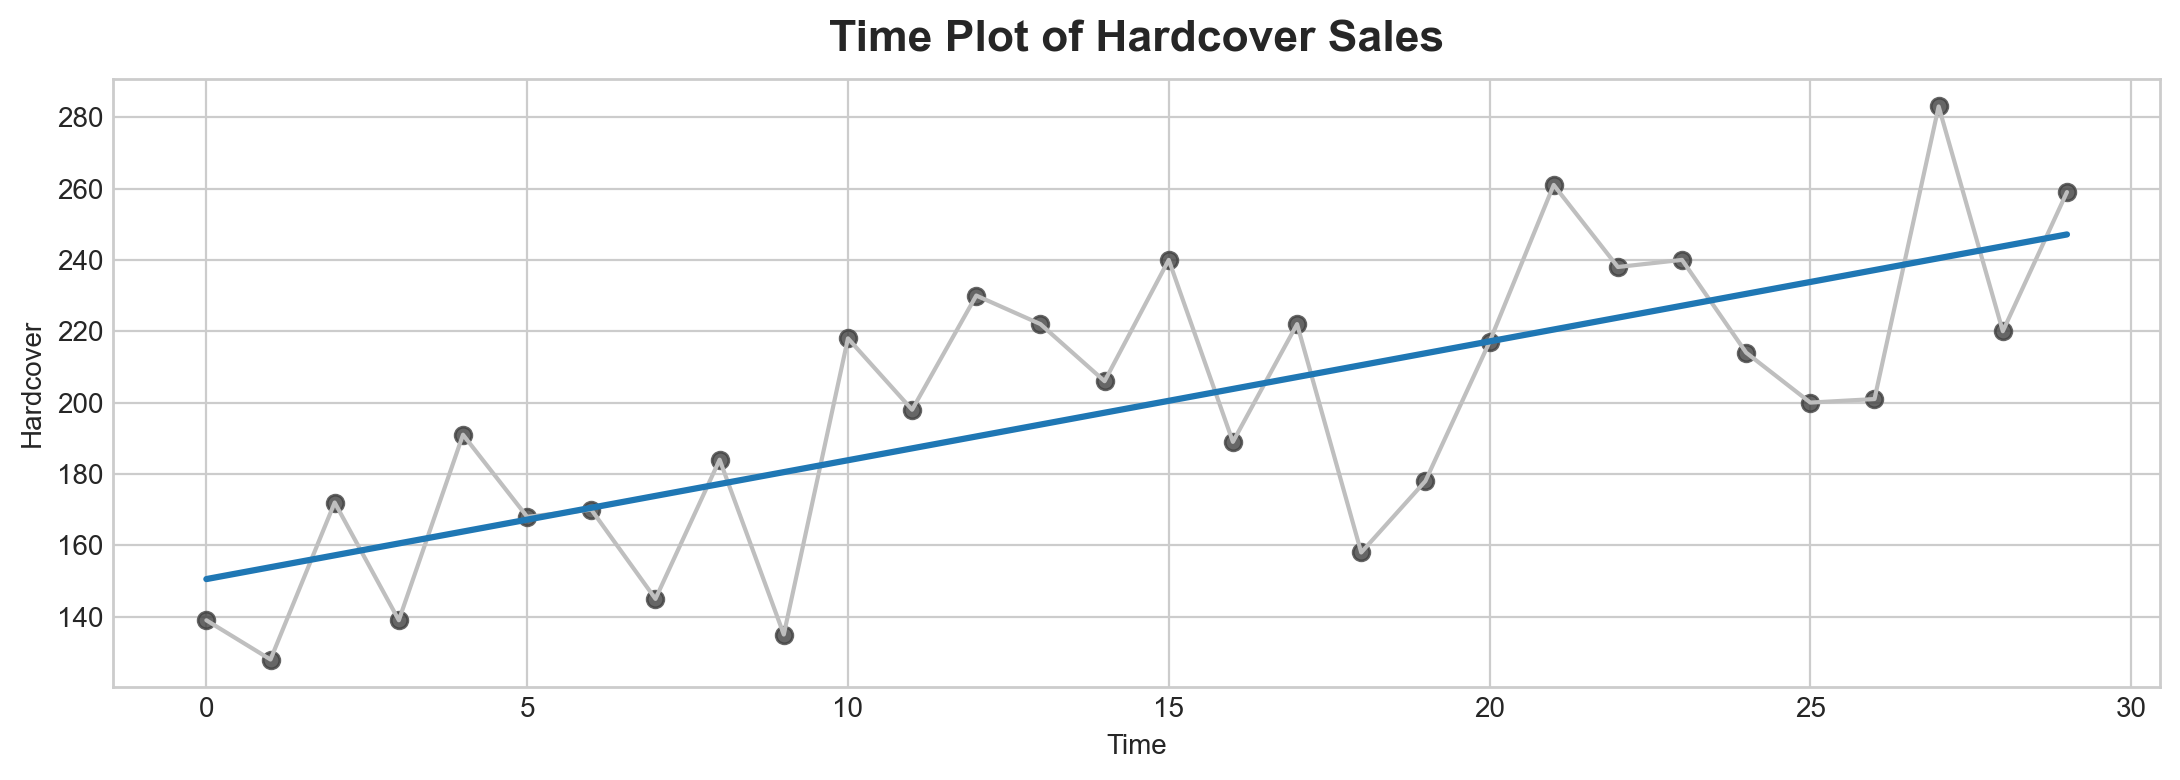

In [5]:
'''타임더미와 함께 선형회귀는 모델을 생성한다.
target = weight * time + bias
time forms the x-axis.
'''

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout = True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold',
)

plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10,
    )
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data = df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws = dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales')

- Time-step features let you model time dependence.
- A series is time dependent if its values can be predicted from the time they occured.m



### Lag features
- shift 써서 전날 것을 가져오기

In [7]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns = ['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


- Linear regression with lag feature가 모델을 만든다.
- target = weight * lag + bias



Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

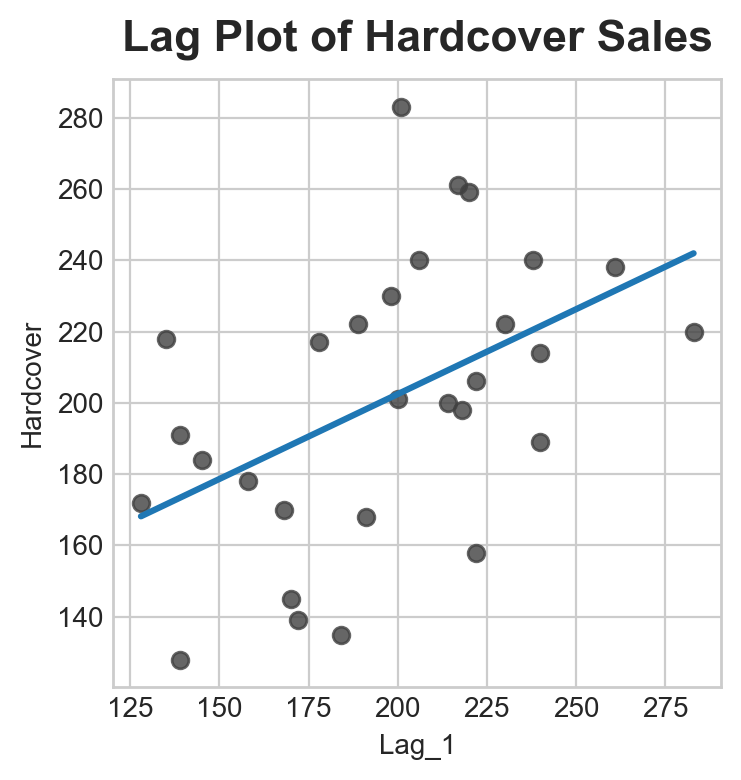

In [9]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

- 상관관계가 우상향 한다.

In [25]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter('ignore') # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True, figsize=(11,4))
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10,
)

plot_params = dict(
    color='0.75',
    style='.-',
    markeredgecolor='0.25',
    markerfacecolor='0.25',
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

tunnel = pd.read_csv('./data/tunnel.csv', parse_dates=['Day'])
# tunnel = tunnel.to_period()

tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


Time-step feature
- 결측치가 없기 때문에 time dummy를 시리즈 길이를 세서 만들 수 있다

In [16]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,Day,NumVehicles,Time
0,2003-11-01,103536,0
1,2003-11-02,92051,1
2,2003-11-03,100795,2
3,2003-11-04,102352,3
4,2003-11-05,106569,4


 사이킷런을 사용해 선형회귀 모델 학습시키는 과정

In [17]:
from sklearn.linear_model import LinearRegression

# Traning data
X = df.loc[:, ['Time']] # features
y = df.loc[:, 'NumVehicles'] # target

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index= X.index)

In [19]:
y

0      103536
1       92051
2      100795
3      102352
4      106569
        ...  
742    104646
743     94424
744    112165
745    114296
746    114690
Name: NumVehicles, Length: 747, dtype: int64

- Lag feature

In [20]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,Day,NumVehicles,Time,Lag_1
0,2003-11-01,103536,0,NaN
1,2003-11-02,92051,1,103536.0
2,2003-11-03,100795,2,92051.0
3,2003-11-04,102352,3,100795.0
4,2003-11-05,106569,4,102352.0


- lag 변수를 만들때, 우리는 결측치 생기는 것 어떻게할지 결정할 필요가 있다.
- 

In [22]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True) # drop missing values in the feature set
y = df.loc[:, 'NumVehicles'] 
y, X = y.align(X, join='inner') # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index= X.index)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

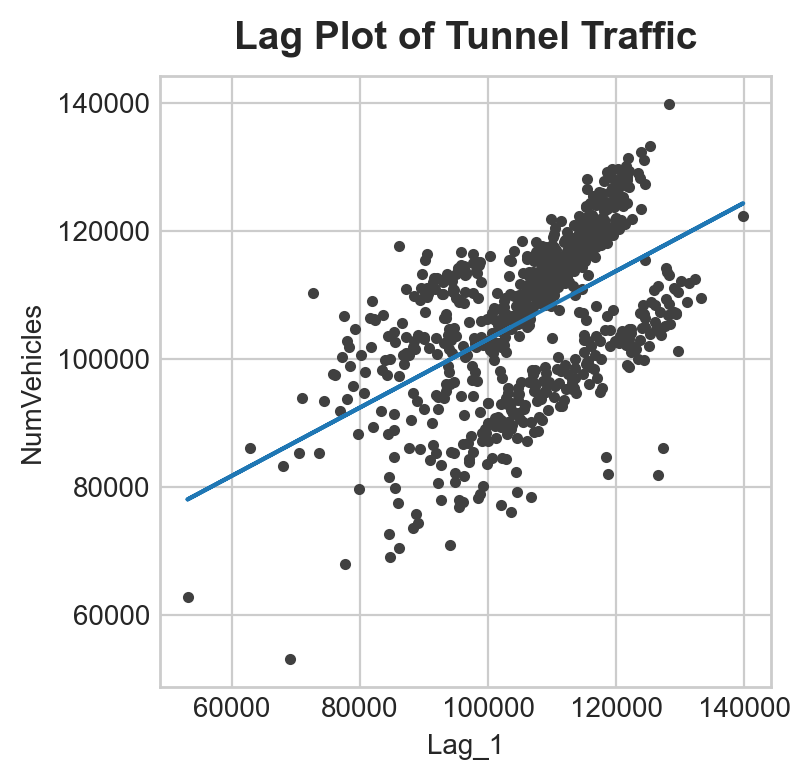

In [23]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

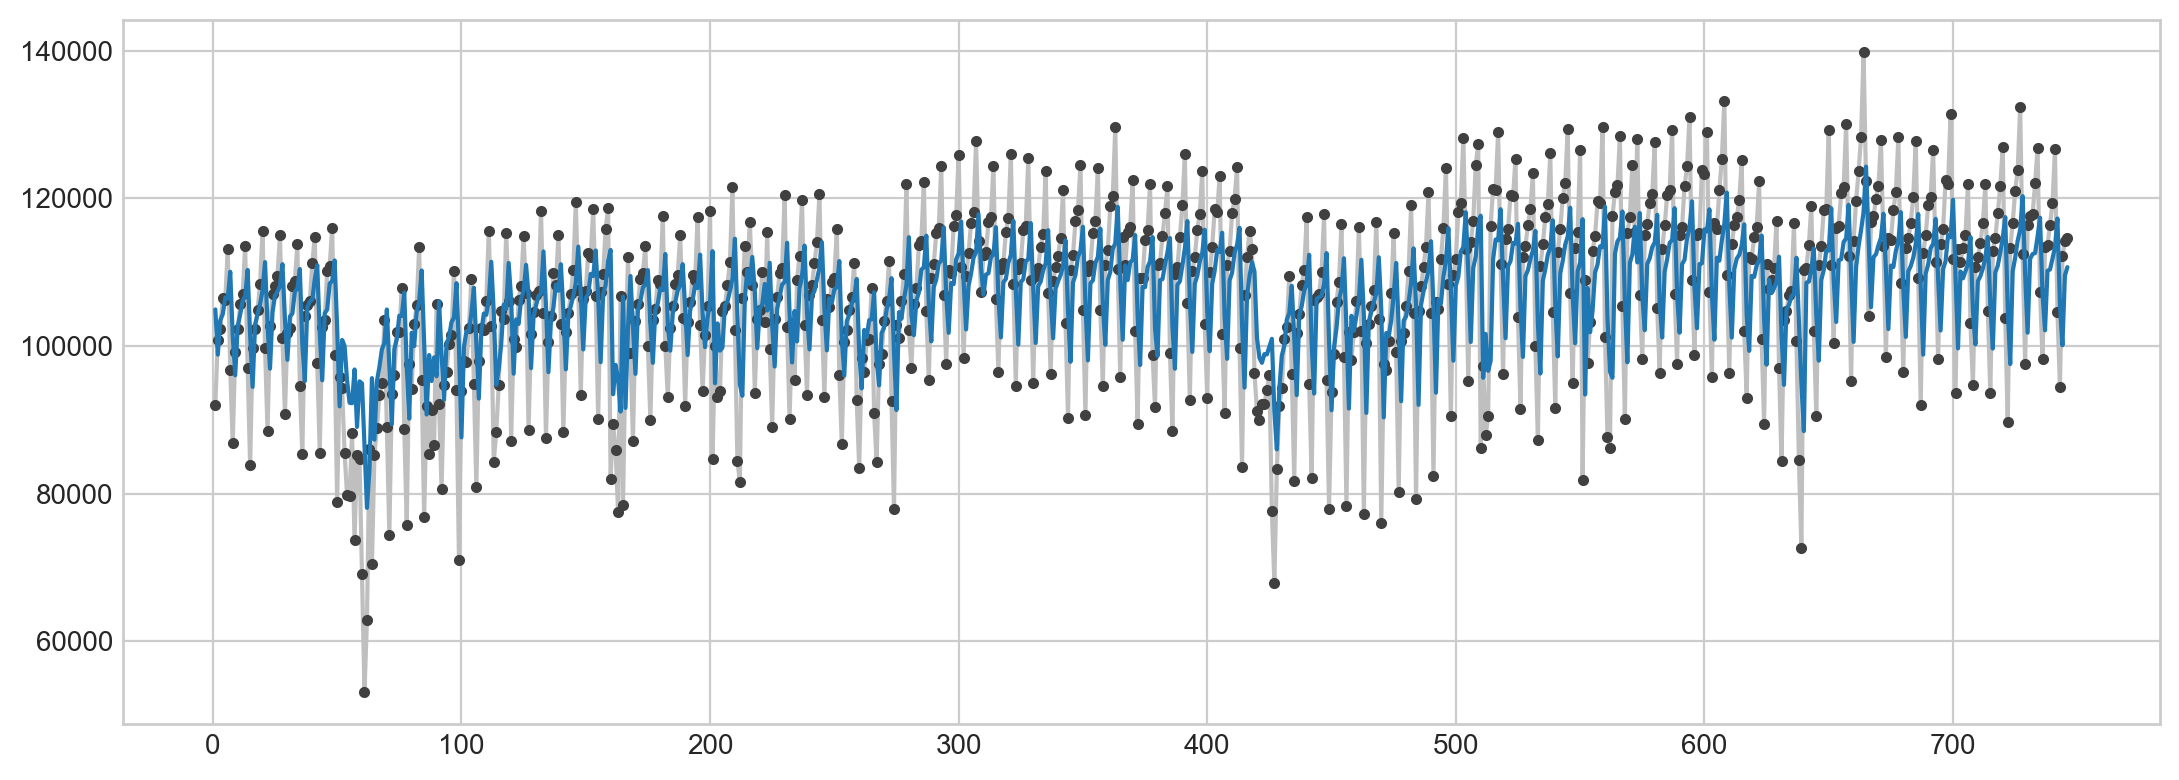

In [26]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

### Trend
- 시계열의 Trend 요소는 지속적이고, long-term 변화이다. 시계열 평균에서.
- 추세는 시리즈의 느리고 천천히 움직이는 부분, 시간 규모의 가장 넓은 부분을 대표한다.
- 지속적이고 천천히 움직이는 시계열적 변화가 trend를 의미 


Moving Average Plots
- trend를 시각화 하기 위해, 시계열에서의 어느 다른 계절성 기간보다 더 긴 기간을 평균내야한다. 
- 예를들면 12사이즈를 윈도우로 설정하고 smoothing 하는 것처럼

Engineering Trend
- 우리가 trend의 형태를 알아챘다면, 우리는 그것을 모델에 사용한다. time-step feature로 사용하면서.
- 우리는 이미 time dummy 그자체를 사용하는 것이 linear trend를 모델링 하는 것을 봐왔다.
- target = a * time+b
- 우리는 time dummy의 다양한 변형을 통해 다양한 트렌드를 만들수있다.



In [30]:
# trend model 만들기
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv("./data/tunnel.csv", parse_dates=["Day"])
# tunnel = tunnel.set_index("Day").to_period()

<Axes: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}>

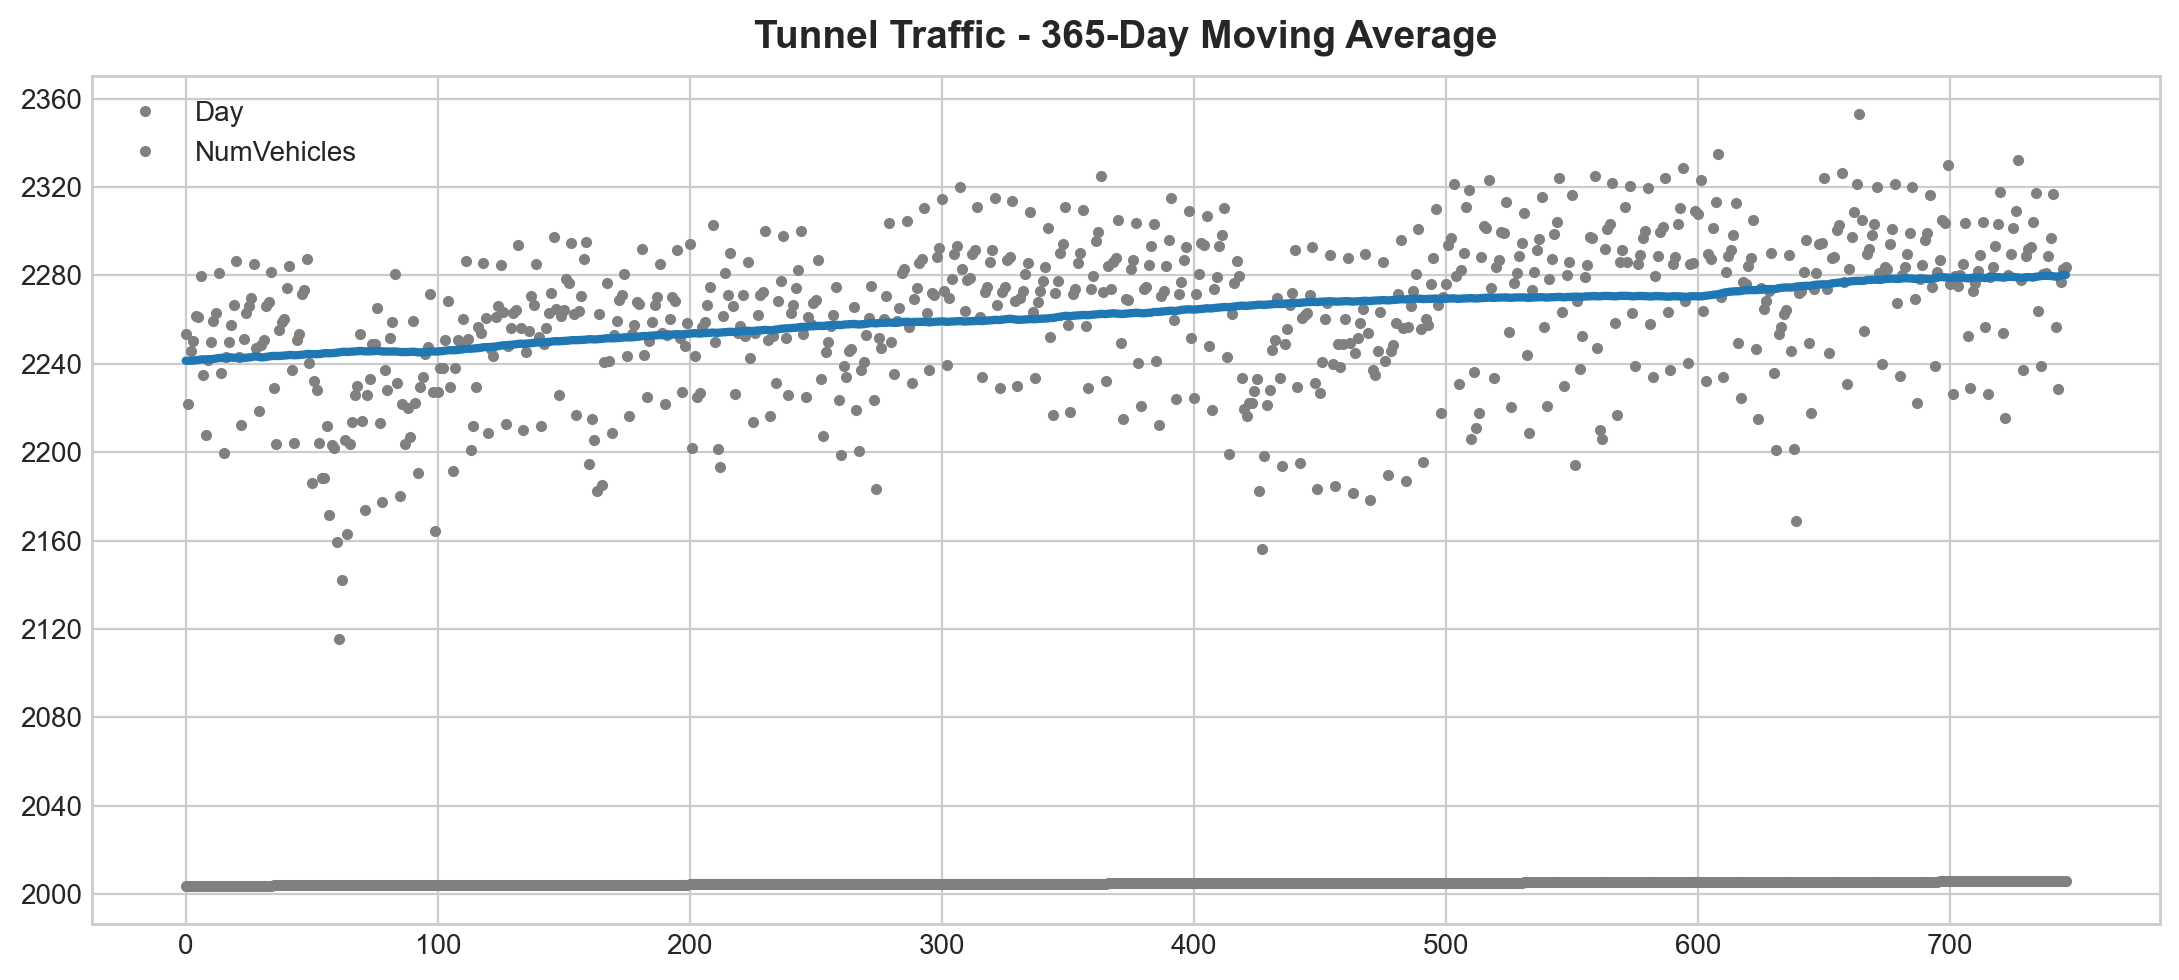

In [31]:
moving_average = tunnel.rolling(
    window = 365, # 365-day window
    center = True, # puts the average at the center of the window
    min_periods=183, # choose about halt the window size
).mean()

ax = tunnel.plot(style='.', color='0.5')
moving_average.plot(
    ax=ax, linewidth=3, title='Tunnel Traffic - 365-Day Moving Average',legend=False,
)

- 아까는 판다스에서 직접 time dummy를 만들었다.
- 지금부터는 statsmodels의 DeterministicProcess를 사용할 것이다.
- 'order' 는 다항식 개수?

In [33]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index = tunnel.index, # dates from the training data
    constant = True, # dummy feature for the bias (y_intercept)
    order = 1, # the time dummy(trend)
    drop=True,
)

# 'in_sample' 은 features를 만든다. index에 주어진 데이트를 위한.
X = dp.in_sample()

X.head()

,const,trend
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,1.0,4.0
4,1.0,5.0


- 그러나 DeterministicProcess는 non-random 하고 완전히 결정된 시계열을 위한 기술적 용어이다.(마치 const와 trend 같은)
- 시간 인덱스로부터 파생된 변수들은 아마 deterministic 할것이다.
- 우리는 우리의 trend 모델을 만들것이다. fit_intercept =False 를 통해

In [34]:
from sklearn.linear_model import LinearRegression

y = tunnel['NumVehicles'] # target

# The intercept 는 'const' feature가 같다.
# DeterministicProcess. LinearRegression은 중복된 상황에서 안좋게 작동한다.
# features, 우리는 그것을 제외할 필요가 있다.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

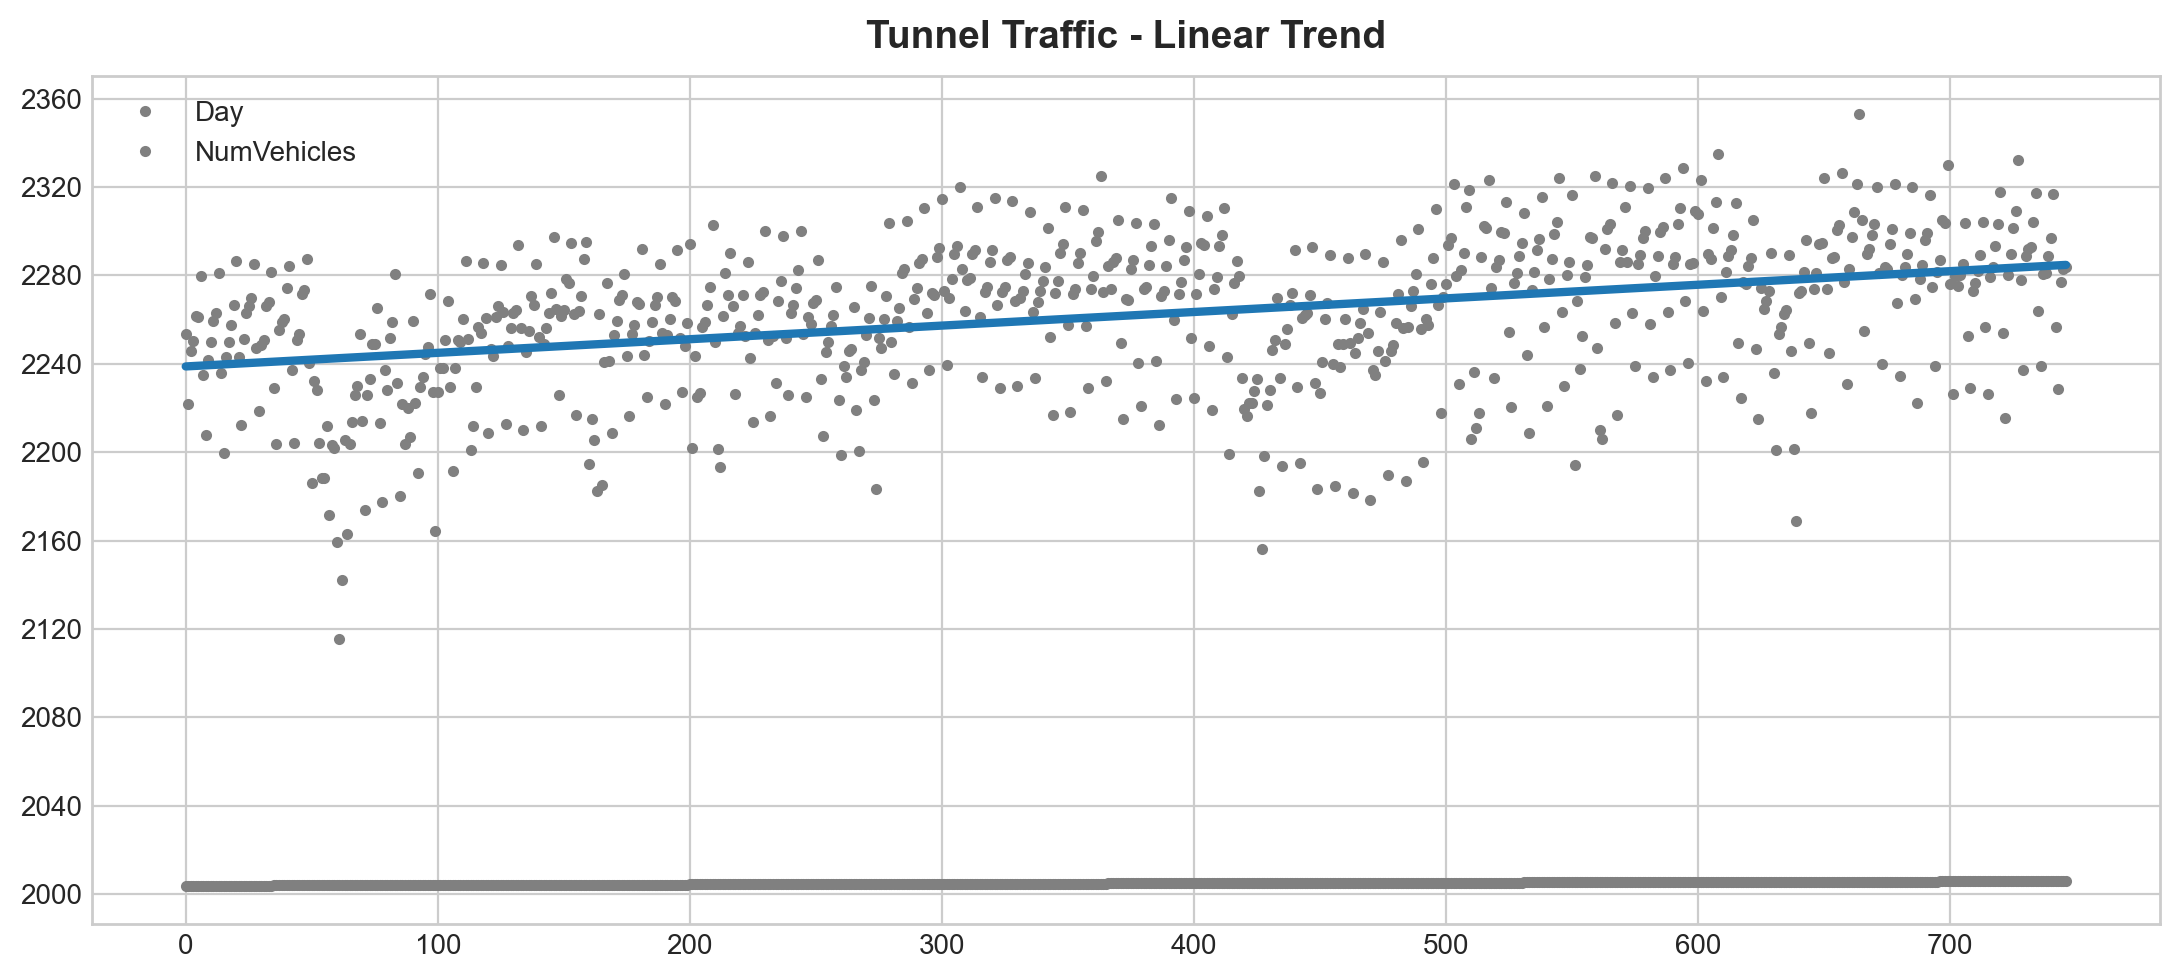

In [35]:
ax = tunnel.plot(style='.', color = '0.5', title='Tunnel Traffic - Linear Trend')
_ = y_pred.plot(ax=ax, linewidth=3, label='Trend')

- 예측을 위해, 우리는 우리의 모델에 'out of sample' features를 적용한다.
- Out of sample은 학습 데이터의 관측된 기간 밖의 시간을 의미한다.
- 아래 코드는 30일의 예측을 만드는 방식이다.

In [38]:
X = dp.out_of_sample(steps=30)
y_fore = pd.Series(model.predict(X), index = X.index)
y_fore

747    114981.801146
748    115004.298595
749    115026.796045
750    115049.293494
751    115071.790944
752    115094.288393
753    115116.785843
754    115139.283292
755    115161.780742
756    115184.278191
757    115206.775641
758    115229.273090
759    115251.770540
760    115274.267990
761    115296.765439
762    115319.262889
763    115341.760338
764    115364.257788
765    115386.755237
766    115409.252687
767    115431.750136
768    115454.247586
769    115476.745035
770    115499.242485
771    115521.739934
772    115544.237384
773    115566.734833
774    115589.232283
775    115611.729733
776    115634.227182
dtype: float64

In [42]:
# ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
# ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
# ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
# _ = ax.legend()